In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of tobii_pytracker.analyze.models failed: Traceback (most recent call last):
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py", line 500, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py", line 349, in update_class
    if update_generic(old_obj, new_obj):
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py", line 397, in update_generic
    update(a, b)
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py"

In [34]:
from tobii_pytracker.analyze.data_loader import DataLoader
from tobii_pytracker.configs.custom_config import CustomConfig

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from tobii_pytracker.analyze.models import (
    HeatmapAnalyzer,
    FocusMapAnalyzer,
    FixationAnalyzer,
    SaccadeAnalyzer,
    EntropyAnalyzer,
    ClusterAnalyzer,
    ConceptAnalyzer,
    ScanpathsAnalyzer,
    VoiceTranscription
)


config = CustomConfig('../configs/config.yaml')
loader = DataLoader(config, root='../')

[autoreload of tobii_pytracker.analyze.models failed: Traceback (most recent call last):
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
  File "c:\Users\szymo\anaconda3\envs\pytracker-env\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "C:\Users\szymo\Software\tobii-pytracker\src\tobii_pytracker\analyze\models.py", line 226, in <module>
    class SaccadeAnalyzer(BaseAnalyzer):
  File "C:\Users\szymo\Software\tobii-pytracker\src\tobii_pytracker\analyze\models.py"

ImportError: cannot import name 'SaccadeAnalyzer' from 'tobii_pytracker.analyze.models' (C:\Users\szymo\Software\tobii-pytracker\src\tobii_pytracker\analyze\models.py)

▶ Global heatmap statistics


,avg_gaze_x,avg_gaze_y,gaze_count
0,122.990196,-143.77451,102


▶ Per-set statistics


,set_name,avg_gaze_x,avg_gaze_y,gaze_count
0,20251105_114523,115.142857,-141.011905,84
1,20251105_114824,159.611111,-156.666667,18


▶ Per-slide statistics


,set_name,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,20251105_114523,0,115.142857,-141.011905,84
1,20251105_114824,0,159.611111,-156.666667,18


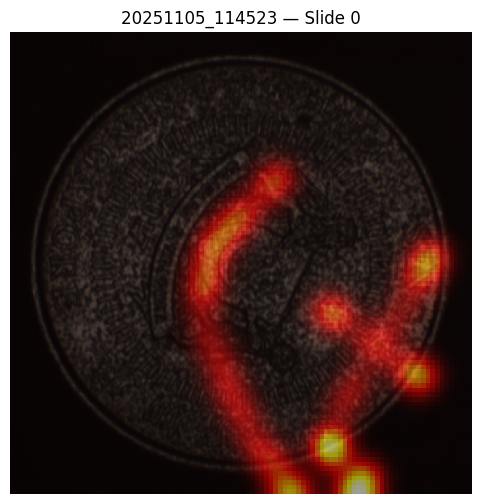

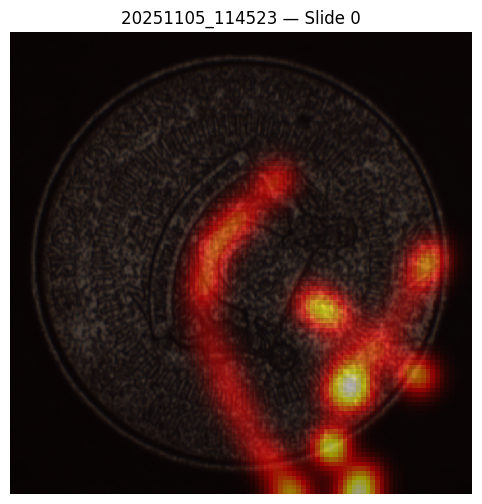

In [ ]:
# Assuming you already have the data
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

analyzer = HeatmapAnalyzer(output_folder=output_dir)

# --- Global ---
print("▶ Global heatmap statistics")
global_stats = analyzer.analyze(background_data, per="global")
display(global_stats)

# --- Set-level ---
print("▶ Per-set statistics")
set_stats = analyzer.analyze(background_data, per="set")
display(set_stats.head())

# --- Slide-level ---
print("▶ Per-slide statistics")
slide_stats = analyzer.analyze(background_data, per="slide")
display(slide_stats.head())

# --- Plot heatmap for one image ---
example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)


analyzer.plot_analysis(
    background_data=background_data,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)
